# 安裝 selenium

In [ ]:
! pip install selenium

# import套件

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


import re
import math
import pandas as pd

from datetime import datetime


# 執行webdriver

In [2]:
driverPath = '/media/shawn-pc/3T/code/python_FBrobot臉書機器人/geckodriver'
driver = webdriver.Firefox(executable_path=driverPath)
url='https://www.facebook.com'
driver.get(url)

# 取得所有回應

In [119]:
#進入網址
url='https://www.facebook.com/taiwango0527/posts/2352312041562083?__xts__[0]=68.ARA0gGpov_pCeqeqBwsqmqke_CO0Eo48xv3N_L3_8NwotpJ4nnP9pnyXFBXax_VJ4Mckk339KinMIN0ySWMScKnhlwCTuP9VlaZMtAGfwIEgX989bcIZMygOz9CCo0clvT--ITekqv1rpF1JBxAtYNMxIQ3aK8kYW1QuzyXhCCBytcHPTcMGN8lT2w_GKMv11GeEnAXgDhIbyhIAzC0syWnRYPSmPGtLEtpBYF8OY3k5IDWa7gftX_MrEN6SK85FSVJ1zK0KQCl6UeW6k1TQx9VttnJKFONLBncIPuT16wjQD2gULqR_27YX65gUkMuEtW7FL9snPFhQFWCX9CBiKeAKAg&__tn__=-R'
driver.get(url)

In [120]:
#顯示所有留言
element = driver.find_elements_by_class_name('_2pm3')
element[0].click()

element = driver.find_elements_by_class_name('_1ojr')
element[2].click()

In [121]:
#檢查有多少回覆或查看更多留言要按，少於10就停下來
while len(driver.find_elements_by_class_name('_4ssp')) > 10:
    clickN = driver.find_elements_by_class_name('_4ssp')
    print(len(clickN))
    for i in range(len(clickN)):
        clickN[i].click()

55
47
33
15
14
12
17
9
11
10
16
10
10
11
6
12
9
8
12
15
10
7
8
10
14
10
8
15
7
13
14
17
10
10
17
14
8
18
17
11
8
9
12
6
11
8
7
6
5
5
7
9
12
10
7
5
6
11
8
5
9
6
8
12
12
3
2
5


In [122]:
htmltext = driver.page_source
soup = BeautifulSoup(htmltext,"lxml")

In [123]:

#建立dataframe存reply
df = pd.DataFrame(columns=['name', 'reply','datetime','url'])
facebook = 'https://www.facebook.com'

#第一層留言者與發言內容寫入df
orderList = soup.find_all('div','_4eek')
for p in orderList:
    name = p.find('a','_6qw4') #第一層留言者的姓名
    reply = p.find('span','_3l3x') #第一層留言者的內容
    datetime = p.find('abbr','livetimestamp')

    if reply is not None:
        #datatime.get('data-tooltip-content')
        df = df.append({
            'name' :name.text ,
            'reply' : reply.text,
            'datetime':datetime.get('data-utime'),
            'url':facebook + name.get('href')
        } , ignore_index=True)
#pd顯示所有row
pd.set_option('display.max_rows', None)

print(df)
export_csv = df.to_csv (r'hsinchu.csv', index = None, header=True) 

                             name  \
0                      Maggie Lin   
1                           小坂 あい   
2                              丁丁   
3                             李秋紅   
4                             米米菲   
5                       Jacky Dai   
6                              吳靜   
7                         Smap Lu   
8                             希真吳   
9                             廖維國   
10                            連廷諺   
11                            吳木樹   
12                             丁大   
13                      Zhong Pei   
14                             吳靜   
15                            羅正倫   
16                            羅正倫   
17                  Liu Pei Sheng   
18                            李秋紅   
19                            王振樺   
20                      Jill Peng   
21                            黃致瑋   
22                            張隆明   
23                            林鈺鈞   
24                            林鈺鈞   
25                            林鈺鈞   
2

In [124]:
timeList = pd.to_datetime(df['datetime'],unit='s')+pd.Timedelta('08:00:00')
#pd.Timestamp(df['datetime'], unit='s', tz='US/Pacific')

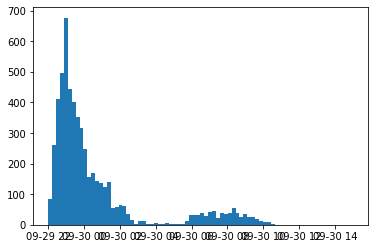

In [128]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.pyplot import figure

_ =plt.hist(timeList, bins='auto',range=['2019-09-29 22:00:00', '2019-09-30 15:00:00'])

plt.show()

<Figure size 640x480 with 0 Axes>

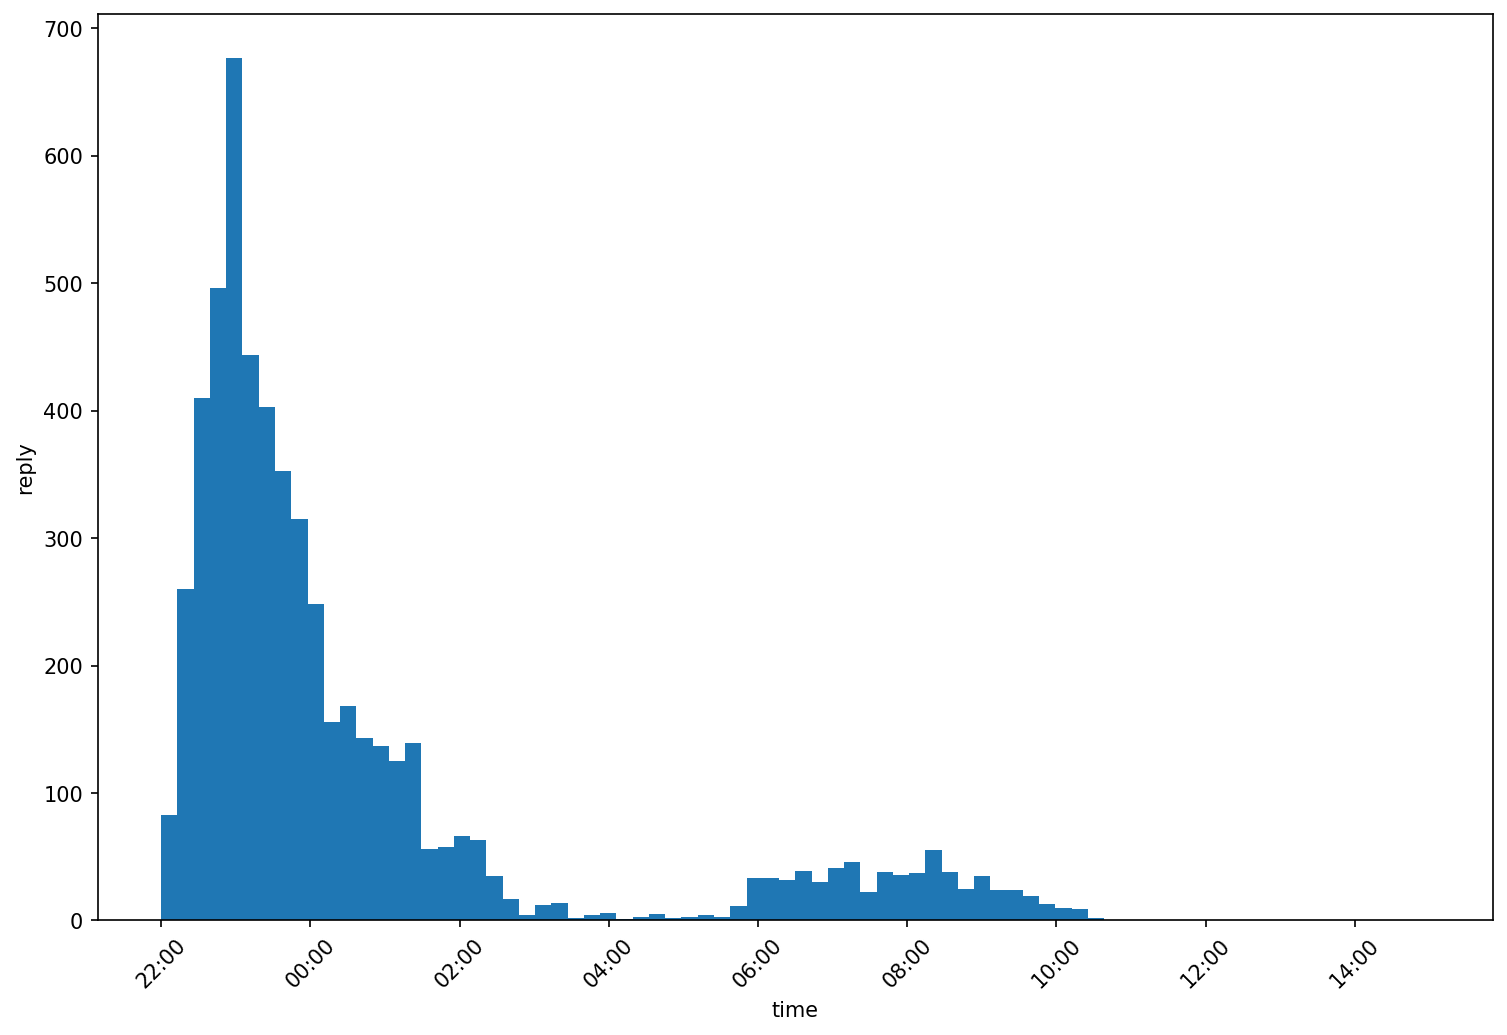

In [135]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
#create histogram, get bin position for label
ax.hist(timeList,bins='auto',range=['2019-09-29 22:00:00', '2019-09-30 15:00:00'])

#plt.xticks(bins)
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('reply')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.show()